In [21]:
import pandas as pd
import requests,csv
import geopandas as gpd
import matplotlib.pyplot as plt

In [22]:
data_dict = {'B08133_001E':'Estimate!!Aggregate travel time to work (in minutes) AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK', 
            'B08133_007E' : 'Estimate!!Aggregate travel time to work (in minutes):!!7:00 a.m. to 7:29 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_008E' : 'Estimate!!Aggregate travel time to work (in minutes):!!7:30 a.m. to 7:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_009E' : 'Estimate!!Aggregate travel time to work (in minutes):!!8:00 a.m. to 8:29 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_010E' : 'Estimate!!Aggregate travel time to work (in minutes):!!8:30 a.m. to 8:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_011E' : 'Estimate!!Aggregate travel time to work (in minutes):!!9:00 a.m. to 9:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_012E' : 'Estimate!!Aggregate travel time to work (in minutes):!!10:00 a.m. to 10:59 a.m. AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08133_013E' : 'Estimate!!Aggregate travel time to work (in minutes):!!11:00 a.m. to 11:59 a.m.	AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_001E' : 'Estimate!!Total SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_007E' : 'Estimate!!Total:!!7:00 a.m. to 7:29 a.m.	SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_008E' : 'Estimate!!Total:!!7:30 a.m. to 7:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_009E' : 'Estimate!!Total:!!8:00 a.m. to 8:29 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_010E' : 'Estimate!!Total:!!8:30 a.m. to 8:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_011E' : 'Estimate!!Total:!!9:00 a.m. to 9:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_012E' : 'Estimate!!Total:!!10:00 a.m. to 10:59 a.m. SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08011_013E' : 'Estimate!!Total:!!11:00 a.m. to 11:59 a.m.	SEX OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK',
            'B08136_002E' : 'Estimate!!Aggregate travel time to work (in minutes):!!Car, truck, or van: AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            'B08136_007E' : 'Estimate!!Aggregate travel time to work (in minutes):!!Public transportation (excluding taxicab): AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            'B08006_001E' : 'Estimate!!Total SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            'B08006_002E' : 'Estimate!!Total:!!Car, truck, or van: SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            'B08006_008E' : 'Estimate!!Total:!!Public transportation (excluding taxicab): SEX OF WORKERS BY MEANS OF TRANSPORTATION TO WORK',
            'B19013_001E' : 'Estimate!!Median household income in the past 12 months (in 2019 inflation-adjusted dollars)	MEDIAN HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2019 INFLATION-ADJUSTED DOLLARS)',
            'B08201_001E' : 'Estimate!!Total: HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
            'B08201_002E': 'Estimate!!Total:!!No vehicle available HOUSEHOLD SIZE BY VEHICLES AVAILABLE',
            'B25003_001E': 'Estimate!!Total: TENURE',
            'B25003_002E': 'Estimate!!Total:!!Owner occupied TENURE',
            'B25003_003E': 'Estimate!!Total:!!Renter occupied TENURE',
            'B02001_001E': 'Estimate!!Total: RACE',
            'B02001_002E': 'Estimate!!Total:!!White alone RACE',
            'B02001_003E' : 'Estimate!!Total:!!Black or African American alone	RACE',
            'B02001_004E' : 'Estimate!!Total:!!American Indian and Alaska Native alone	RACE',
            'B02001_005E' : 'Estimate!!Total:!!Asian alone RACE',
            'B02001_008E' : 'Estimate!!Total:!!Two or more races: RACE',
            'B02008_001E' : 'Estimate!!Total: WHITE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES',
            'B02009_001E': 'Estimate!!Total: BLACK OR AFRICAN AMERICAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES',
            'B02010_001E' : 'Estimate!!Total: AMERICAN INDIAN AND ALASKA NATIVE ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES',
            'B02011_001E' : 'Estimate!!Total: ASIAN ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES',
            'B02012_001E' : 'Estimate!!Total: NATIVE HAWAIIAN AND OTHER PACIFIC ISLANDER ALONE OR IN COMBINATION WITH ONE OR MORE OTHER RACES',
            "avg_time_agg" : "Average travel time to work, all modes of transportation = Aggregate travel time to work in minutes / Total workers",
            "avg_time_to_work_7_8am" : "Average travel time to work, all modes of transportation, for workers departing for work between 7-8am (B08133_007E + B08133_008E)/(B08011_007E+ B08011_008E)",
            "avg_time_to_work_8_9am": "Average travel time to work, all modes of transportation, for workers departing for work between 8-9am (B08133_009E + B08133_010E)/(B08011_009E+ B08011_010E)",
            "avg_time_to_work_9_10am" : "Average travel time to work, all modes of transportation, for workers departing for work between 9-10am (B08133_011E + B08133_012E)/(B08011_011E+ B08011_012E)",
            "avg_travel_ctv" : "Average travel time to work for workers travelling via car, truck, or van (B08136_002E/B08006_002E)",
            "avg_travel_pt" : "Average travel time to work for workers travelling via public transportation (B08136_007E/B08006_008E)",
            "pct_workers_ctv" : "Percentage of workers travelling to work via car, truck, or van ((df.B08006_002E/df.B08006_001E) * 100)",
            "pct_workers_pt": "Percentage of workers travelling to work via public transportation ((df.B08006_008E/df.B08006_001E) * 100)",
            "pct_households_no_car" : "Percentage of households with no car available (B08201_002E/B08201_001E) * 100)",
            "pct_households_min_car" : "Percentage of household with one car available ((B08201_001E-B08201_002E)/B08201_002E) * 100)",
            "pct_renter_occupied_units" : "Percentage of units that are renter occupied ((B25003_003E/B25003_001E) * 100)",
            "pct_owner_occupied_units" : "Percentage of units that are owner occupied (B25003_002E/B25003_001E) * 100)"}

data_dict = pd.Series(data_dict, name = "Definition")
data_dict.index.name = "col_name"
data_dict = data_dict.reset_index()

In [34]:
years = [2015,2019]
key = '9e840ebf4aecf1dfee3001ca5b9df8a1c5c8e541'
variables="NAME,B08133_001E,B08011_001E,B08011_007E,B08133_007E,B08011_008E,B08133_008E,B08011_009E,B08133_009E,B08011_010E,B08133_010E,B08011_011E,B08133_011E,B08011_012E,B08133_012E,B08011_013E,B08133_013E,B08136_002E,B08136_007E,B08136_012E,B08006_002E,B08006_008E,B08006_016E,B19013_001E,B08006_001E,B08201_001E,B08201_002E,B25003_001E,B25003_002E,B25003_003E,"

# race tables
variables = variables + "B02001_001E,B02001_002E,B02001_003E,B02001_004E,B02001_005E,B02001_008E,B02008_001E,B02009_001E,B02010_001E,B02011_001E,B02012_001E"
for y in years:
    # url=f"https://api.census.gov/data/{y}/acs/acs5?get={variables}&for=tract:*&in=state:44&key={key}"
    url=f"https://api.census.gov/data/{y}/acs/acs5?get={variables}&for=zip%20code%20tabulation%20area:*&in=state:44&key={key}"
    
    response = requests.get(url)
    data = response.json()

    with open(f"RI_ZCTA_raw_{y}.csv", "w", newline='') as writefile:
        writer = csv.writer(writefile, quoting=csv.QUOTE_ALL, delimiter=',')
        writer.writerows(data)

for y in years:
    df = pd.read_csv(f"RI_ZCTA_raw_{y}.csv")
    # B08133_001E = Estimate!!Aggregate travel time to work (in minutes) AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK
    # 
    df["avg_time_agg"] = df.B08133_001E/df.B08011_001E 
    # (Aggregate travel time (minutes) to work in minutes of workers departing between 7AM and 7:29 + Aggregate travel time (minutes) 
    # of workers departing between 7:30 and 7:59)
    
    df["avg_time_to_work_7_8am"] = (df.B08133_007E + df.B08133_008E)/(df.B08011_007E+ df.B08011_008E)
    df["avg_time_to_work_8_9am"] = (df.B08133_009E + df.B08133_010E)/(df.B08011_009E+ df.B08011_010E)
    df["avg_time_to_work_9_10am"] = (df.B08133_011E + df.B08133_012E)/(df.B08011_011E+ df.B08011_012E)

    df["avg_travel_ctv"] = df.B08136_002E/df.B08006_002E # Average travel time to work by car, truck, or van
    df['avg_travel_pt'] =  df.B08136_007E/df.B08006_008E # Average travel time to work by public transit, excluding taxi

    df['pct_workers_ctv'] = (df.B08006_002E/df.B08006_001E) * 100
    df['pct_workers_pt'] = (df.B08006_008E/df.B08006_001E) * 100

    df['pct_households_no_car'] = (df.B08201_002E/df.B08201_001E) * 100
    df['pct_households_min_car'] = ((df.B08201_001E-df.B08201_002E)/df.B08201_002E) * 100

    df['pct_renter_occupied_units'] = (df.B25003_003E/df.B25003_001E) * 100
    df['pct_owner_occupied_units'] = (df.B25003_002E/df.B25003_001E) * 100

    df = df.rename(columns = {'B19013_001E':'mhi', 'B02001_001E':'total_population_race','B02001_002E':'num_white_alone','B02001_003E':'num_baa_alone'})

    df['pct_white'] = (df.num_white_alone/df.total_population_race) * 100
    df['pct_nonwhite'] = ((df.total_population_race - df.num_white_alone)/df.total_population_race) * 100

    df['year'] = y
    df.to_csv(f"RI_ZCTA_mod_{y}.csv")
    # data_2015['avg_travel_other'] = data_2015.B08136_012E/data_2015.B08006_016E

data_2015 = pd.read_csv("RI_ZCTA_mod_2015.csv")
data_2019 = pd.read_csv("RI_ZCTA_mod_2019.csv")

with pd.ExcelWriter('ZCTA_data.xlsx') as writer:
    data_dict.to_excel(writer, sheet_name="Data Dictionary")
    data_2015.to_excel(writer, sheet_name="ACS_2015")
    data_2019.to_excel(writer, sheet_name="ACS_2019")

# Shapefile of Providence zipcode boundaries, collected from https://data.providenceri.gov/Reference/Zip-Codes/2d8k-gbfp
zipcodes = gpd.read_file('shapefiles/Zip Codes/geo_export_7b90692b-83fc-4198-a66c-777f7ea4963d.shp')

# creating zip column to match zip on shapefile
data_2019[['NAME','zip']] = data_2019.NAME.str.split(' ', expand=True)
data_2015[['NAME','zip']] = data_2015.NAME.str.split(' ', expand=True)

zcta_2015_gdf = zipcodes.merge(data_2015, on="zip")
zcta_2019_gdf = zipcodes.merge(data_2019, on="zip")

In [25]:
# 2015 visualizations
year = 2015
gdf = zcta_2015_gdf

# Average Time to Work, Overall
fig,ax = plt.subplots(1,figsize=(10,6))
gdf.plot(column='avg_time_agg',legend=True, cmap='YlOrRd',edgecolor='white',ax=ax,legend_kwds={'label':'Average Time to Work, Minutes'})
ax.axis('off')
ax.set_title(f'Average Travel Time to Work, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig.savefig(f'Visualizations/average_time_to_work_zip_{year}.png',bbox='tight')
plt.close()

gdf[['zip','avg_time_agg','pct_workers_ctv']].sort_values(by='avg_time_agg',ascending=False).to_csv(f'Tables/average_time_to_work_zip_{year}.csv')

# Percent workers who travel to work via car
fig,ax = plt.subplots(1,figsize=(10,6))
gdf.plot(column='pct_workers_ctv',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax,legend_kwds = {'label':'% Workers'})
ax.axis('off')
ax.set_title(f'Percentage of workers who travel to work via car, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig.savefig(f'Visualizations/pct_workers_car_zipcode_{year}.png',bbox='tight')
plt.close()

# Housing Tenure
fig, ax = plt.subplots(1,figsize=(8,6))
labels = gdf['zip']
renters = gdf['pct_renter_occupied_units']
owners = gdf['pct_owner_occupied_units']
ax.bar(labels, renters, .35, label='% Renter Occupied')
ax.bar(labels, owners, .35, bottom=renters, label='% Owner Occupied')
ax.set_ylabel('% Housing Tenure')
ax.set_xlabel('Zip Code')
ax.set_title(f'% Housing Tenure by Zip Code, {year}')
ax.legend(loc='upper right')
fig.savefig(f'Visualizations/housing_tenure_{year}.png',bbox='tight')
plt.close()

gdf[['zip','pct_renter_occupied_units','pct_owner_occupied_units']].to_csv(f'Tables/housing_tenure_{year}.csv')

# Median Household Income
fig,ax = plt.subplots(1,figsize=(10,6))
gdf.plot(column='B19013_001E',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax,legend_kwds ={'label': 'Median Household Income'})
ax.axis('off')
ax.set_title(f'Median Household Income by Zipcode, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig.savefig(f'Visualizations/median_income_{year}.png',bbox='tight')
plt.close()

gdf[['zip','B19013_001E']].rename(columns={'zip':'Zip Code', 'B19013_001E': 'Median Household Income'}).to_csv(f'Tables/mhi_{year}.csv')

# Percentage of Households Without a Car
fig,ax = plt.subplots(1,figsize=(10,6))
gdf.plot(x="zip", y="pct_households_no_car", kind="bar",figsize=(9,8),ax=ax)
ax.legend(labels=['% Households'])
ax.set_title(f"% Households Without a Car, {year}")
ax.set_ylabel('% Households')
ax.set_xlabel('Zip Code')
fig.savefig(f'Visualizations/pct_households_no_car_{year}.png',bbox='tight')
plt.close()

gdf[['zip','pct_households_no_car']].rename(columns={'zip':'Zip Code', 'pct_households_no_car': '% Households Without a Car'}).to_csv(f'Tables/pct_households_no_car_{year}.csv')

# Car commute vs transit
fig,ax = plt.subplots(1,figsize=(10,6))
gdf[gdf.avg_travel_ctv.isna() == False].plot(x="zip", y=["avg_travel_ctv", "avg_travel_pt"], kind="bar",figsize=(9,8),ax=ax)
ax.legend(labels=['Average time by car','Average time by public transport'])
ax.set_title(f'Commute Time Difference, Car versus Transit, {year}')
ax.set_ylabel('Commute Time, Minutes')
ax.set_xlabel('Zip Code')
fig.savefig(f'Visualizations/bar_chart_travel_time_modes_transport_{year}.png',bbox='tight')
plt.close()

/var/folders/28/4n2m2j3n3_3gt31qw5m99kkc0000gn/T/ipykernel_1509/720030420.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'Visualizations/average_time_to_work_zip_{year}.png',bbox='tight')
/var/folders/28/4n2m2j3n3_3gt31qw5m99kkc0000gn/T/ipykernel_1509/720030420.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'Visualizations/pct_workers_car_zipcode_{year}.png',bbox='tight')
/var/folders/28/4n2m2j3n3_3gt31qw5m99kkc0000gn/T/ipykernel_1509/720030420.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'Visualizations/housing_tenure_{year}.png',bbox='tight')
/var/folders/28/4n

In [26]:
# 2019 visualizations
year = 2019
gdf = zcta_2019_gdf

# Average Time to Work, Overall
fig,ax = plt.subplots(1,figsize=(10,6))
gdf.plot(column='avg_time_agg',legend=True, cmap='YlOrRd',edgecolor='white',ax=ax,legend_kwds={'label':'Average Time to Work, Minutes'})
ax.axis('off')
ax.set_title(f'Average Travel Time to Work, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig.savefig(f'Visualizations/average_time_to_work_zip_{year}.png',bbox='tight')
plt.close()

gdf[['zip','avg_time_agg','pct_workers_ctv']].sort_values(by='avg_time_agg',ascending=False).to_csv(f'Tables/average_time_to_work_zip_{year}.csv')

# Percent workers who travel to work via car
fig,ax = plt.subplots(1,figsize=(10,6))
gdf.plot(column='pct_workers_ctv',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax,legend_kwds = {'label':'% Workers'})
ax.axis('off')
ax.set_title(f'Percentage of workers who travel to work via car, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig.savefig(f'Visualizations/pct_workers_car_zipcode_{year}.png',bbox='tight')
plt.close()

# Housing Tenure
fig, ax = plt.subplots(1,figsize=(8,6))
labels = gdf['zip']
renters = gdf['pct_renter_occupied_units']
owners = gdf['pct_owner_occupied_units']
ax.bar(labels, renters, .35, label='% Renter Occupied')
ax.bar(labels, owners, .35, bottom=renters, label='% Owner Occupied')
ax.set_ylabel('% Housing Tenure')
ax.set_xlabel('Zip Code')
ax.set_title(f'% Housing Tenure by Zip Code, {year}')
ax.legend(loc='upper right')
fig.savefig(f'Visualizations/housing_tenure_{year}.png',bbox='tight')
plt.close()

gdf[['zip','pct_renter_occupied_units','pct_owner_occupied_units']].to_csv(f'Tables/housing_tenure_{year}.csv')

# Median Household Income
fig,ax = plt.subplots(1,figsize=(10,6))
gdf.plot(column='B19013_001E',legend=True, cmap='YlOrRd',edgecolor='black',ax=ax,legend_kwds ={'label': 'Median Household Income'})
ax.axis('off')
ax.set_title(f'Median Household Income by Zipcode, {year}', fontdict={'fontsize': '15', 'fontweight' : '3'})
fig.savefig(f'Visualizations/median_income_{year}.png',bbox='tight')
plt.close()

gdf[['zip','B19013_001E']].rename(columns={'zip':'Zip Code', 'B19013_001E': 'Median Household Income'}).to_csv(f'Tables/mhi_{year}.csv')

# Percentage of Households Without a Car
fig,ax = plt.subplots(1,figsize=(8,6))
gdf.plot(x="zip", y="pct_households_no_car", kind="bar",figsize=(9,8),ax=ax)
ax.legend(labels=['% Households'])
ax.set_title(f"% Households Without a Car, {year}")
ax.set_ylabel('% Households')
ax.set_xlabel('Zip Code')
fig.savefig(f'Visualizations/pct_households_no_car_{year}.png',bbox='tight')
plt.close()

gdf[['zip','pct_households_no_car']].rename(columns={'zip':'Zip Code', 'pct_households_no_car': '% Households Without a Car'}).to_csv(f'Tables/pct_households_no_car_{year}.csv')

# Car commute vs transit
fig,ax = plt.subplots(1,figsize=(10,6))
gdf[gdf.avg_travel_ctv.isna() == False].plot(x="zip", y=["avg_travel_ctv", "avg_travel_pt"], kind="bar",figsize=(9,8),ax=ax)
ax.legend(labels=['Average time by car','Average time by public transport'])
ax.set_ylabel('Commute Time, Minutes')
ax.set_xlabel('Zip Code')
ax.set_title(f'Commute Time Difference, Car versus Transit, {year}')
fig.savefig(f'Visualizations/bar_chart_travel_time_modes_transport_{year}.png',bbox='tight')
plt.close()

/var/folders/28/4n2m2j3n3_3gt31qw5m99kkc0000gn/T/ipykernel_1509/2848621190.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'Visualizations/average_time_to_work_zip_{year}.png',bbox='tight')
/var/folders/28/4n2m2j3n3_3gt31qw5m99kkc0000gn/T/ipykernel_1509/2848621190.py:20: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'Visualizations/pct_workers_car_zipcode_{year}.png',bbox='tight')
/var/folders/28/4n2m2j3n3_3gt31qw5m99kkc0000gn/T/ipykernel_1509/2848621190.py:34: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.savefig(f'Visualizations/housing_tenure_{year}.png',bbox='tight')
/var/folders/28

In [27]:
gdf[['zip','pct_renter_occupied_units','pct_owner_occupied_units']].rename(columns = {'zip':'Zip Code', 'pct_renter_occupied_units':'% Renter Occupied','pct_owner_occupied_units':'% Owner Occupied'})

,Zip Code,% Renter Occupied,% Owner Occupied
0,02906,52.138112,47.861888
1,02903,83.620506,16.379494
2,02905,53.063063,46.936937
3,02907,70.839564,29.160436
4,02909,67.734877,32.265123
5,02908,55.666860,44.333140
6,02904,52.632833,47.367167


In [28]:
gdf[['zip','B19013_001E']].rename(columns={'zip':'Zip Code', 'B19013_001E': 'Median Household Income'})

,Zip Code,Median Household Income
0,02906,85270
1,02903,36347
2,02905,47942
3,02907,39877
4,02909,42041
5,02908,51981
6,02904,44269


In [29]:
import numpy as np
test = zcta_2015_gdf[['zip','avg_time_agg','avg_travel_ctv','avg_travel_pt']].sort_values(by='avg_time_agg',ascending=False)
print(f'Average Travel Time to Work, Overall: = {np.average(test.avg_time_agg)}')
print(f'Average Travel Time to Work, Car, Truck, or Van: = {np.average(test.loc[test.avg_travel_ctv.isna()==False].avg_travel_ctv)}')
print(f'Average Travel Time to Work, Public Transportation: = {np.average(test.loc[test.avg_travel_pt.isna()==False].avg_travel_pt)}')

Average Travel Time to Work, Overall: = 22.038721183770257
Average Travel Time to Work, Car, Truck, or Van: = 20.60742410163792
Average Travel Time to Work, Public Transportation: = 44.765692800511935


In [30]:
# years = [2015,2019]
# key = '9e840ebf4aecf1dfee3001ca5b9df8a1c5c8e541'
# variables="NAME,B08133_001E,B08011_001E,B08011_007E,B08133_007E,B08011_008E,B08133_008E,B08011_009E,B08133_009E,B08011_010E,B08133_010E,B08011_011E,B08133_011E,B08011_012E,B08133_012E,B08011_013E,B08133_013E,B08136_002E,B08136_007E,B08136_012E,B08006_002E,B08006_008E,B08006_016E,B19013_001E"

# for y in years:
#     url=f"https://api.census.gov/data/{y}/acs/acs5?get={variables}&for=tract:*&in=state:44&key={key}"
#     # url=f"https://api.census.gov/data/{y}/acs/acs5?get={variables}&for=zip%20code%20tabulation%20area:*&in=state:44&key={key}"
    
#     response = requests.get(url)
#     data = response.json()

#     with open(f"RI_tract_raw_{y}.csv", "w", newline='') as writefile:
#         writer = csv.writer(writefile, quoting=csv.QUOTE_ALL, delimiter=',')
#         writer.writerows(data)

# for y in years:
#     df = pd.read_csv(f"RI_tract_raw_{y}.csv")
#     # B08133_001E = Estimate!!Aggregate travel time to work (in minutes) AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK
#     # 
#     df["avg_time_agg"] = df.B08133_001E/df.B08011_001E 
#     # (Aggregate travel time (minutes) to work in minutes of workers departing between 7AM and 7:29 + Aggregate travel time (minutes) 
#     # of workers departing between 7:30 and 7:59) / 
#     df["avg_time_to_work_7_8am"] = (df.B08133_007E + df.B08133_008E)/(df.B08011_007E+ df.B08011_008E)
#     df["avg_time_to_work_8_9am"] = (df.B08133_009E + df.B08133_010E)/(df.B08011_009E+ df.B08011_010E)
#     df["avg_time_to_work_9_10am"] = (df.B08133_011E + df.B08133_012E)/(df.B08011_011E+ df.B08011_012E)

#     df["avg_travel_ctv"] = df.B08136_002E/df.B08006_002E # Average travel time to work by car, truck, or van
#     df['avg_travel_pt'] =  df.B08136_007E/df.B08006_008E # Average travel time to work by public transit, excluding taxi
#     df['year'] = y
#     df.to_csv(f"RI_tract_mod_{y}.csv")
#     # data_2015['avg_travel_other'] = data_2015.B08136_012E/data_2015.B08006_016E

# tract_data_2015 = pd.read_csv("RI_TRACT_mod_2015.csv")
# tract_data_2019 = pd.read_csv("RI_TRACT_mod_2019.csv")

# with pd.ExcelWriter('TRACT_data.xlsx') as writer:
#     data_dict.to_excel(writer, sheet_name="Data Dictionary")
#     tract_data_2015.to_excel(writer, sheet_name="ACS_2015")
#     tract_data_2019.to_excel(writer, sheet_name="ACS_2019")

# tracts = gpd.read_file('shapefiles/cb_2020_44_tract_500k/cb_2020_44_tract_500k.shp')

# tract_data_2015[['NAMELSAD','NAME']] = tract_data_2015.NAME.str.split(',', n=1,expand=True)
# tract_data_2019[['NAMELSAD','NAME']] = tract_data_2019.NAME.str.split(',', n=1,expand=True)

# # tract_data_2015=tract_data_2015.rename(columns={'tract':'TRACTCE'})


# # tracts_2015_gdf = tracts.merge(tract_data_2015, on = 'TRACTCE')

# # tracts_2015_gdf.plot('avg_time_agg')


# for y in years:
#     # url=f"https://api.census.gov/data/{y}/acs/acs5?get={variables}&for=tract:*&in=state:44&key={key}"
#     url = f'https://api.census.gov/data/{y}/acs/acs5/spt?get={variables}&for=place:59000&in=state:44&key={key}'  
    
#     response = requests.get(url)
#     data = response.json()

#     with open(f"RI_tract_raw_{y}.csv", "w", newline='') as writefile:
#         writer = csv.writer(writefile, quoting=csv.QUOTE_ALL, delimiter=',')
#         writer.writerows(data)

# for y in years:
#     df = pd.read_csv(f"RI_providence_raw_{y}.csv")
#     # B08133_001E = Estimate!!Aggregate travel time to work (in minutes) AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY TIME OF DEPARTURE TO GO TO WORK
#     # 
#     df["avg_time_agg"] = df.B08133_001E/df.B08011_001E 
#     # (Aggregate travel time (minutes) to work in minutes of workers departing between 7AM and 7:29 + Aggregate travel time (minutes) 
#     # of workers departing between 7:30 and 7:59) / 
#     df["avg_time_to_work_7_8am"] = (df.B08133_007E + df.B08133_008E)/(df.B08011_007E+ df.B08011_008E)
#     df["avg_time_to_work_8_9am"] = (df.B08133_009E + df.B08133_010E)/(df.B08011_009E+ df.B08011_010E)
#     df["avg_time_to_work_9_10am"] = (df.B08133_011E + df.B08133_012E)/(df.B08011_011E+ df.B08011_012E)

#     df["avg_travel_ctv"] = df.B08136_002E/df.B08006_002E # Average travel time to work by car, truck, or van
#     df['avg_travel_pt'] =  df.B08136_007E/df.B08006_008E # Average travel time to work by public transit, excluding taxi
#     df['year'] = y
#     df.to_csv(f"RI_tract_mod_{y}.csv")
#     # data_2015['avg_travel_other'] = data_2015.B08136_012E/data_2015.B08006_016E

# providence_data_2015 = pd.read_csv("RI_providence_mod_2015.csv")
# providence_data_2019 = pd.read_csv("RI_providence_mod_2019.csv")

# with pd.ExcelWriter('providence_data.xlsx') as writer:
#     data_dict.to_excel(writer, sheet_name="Data Dictionary")
#     providence_data_2015.to_excel(writer, sheet_name="ACS_2015")
#     providence_data_2019.to_excel(writer, sheet_name="ACS_2019")

In [31]:
# PLAYGROUND / OLD CODE TESTS

# tracts.loc[tracts.NAMELSAD == 'Census Tract 122']

# data_2015 = data_2015.rename(columns={'tract':'TRACTCE'})

# bg = gpd.read_file('tl_2018_44_bg/tl_2018_44_bg.shp')
# bg

# bg['GEOID'] = '15000US' + bg['GEOID']
# bg

# full_data = gpd.read_file('ACS_2019_5YR_BG_44_RHODE_ISLAND.gdb')

# full_data.columns

# B08301e1	MEANS OF TRANSPORTATION TO WORK: Total: Workers 16 years and over -- (Estimate)
# B08301e2	MEANS OF TRANSPORTATION TO WORK: Car, truck, or van: Workers 16 years and over -- (Estimate)
# B08136e2	AGGREGATE TRAVEL TIME TO WORK (IN MINUTES) OF WORKERS BY MEANS OF TRANSPORTATION TO WORK: Car, truck, or van: Workers 16 years and over who did not work from home -- (Estimate)
# gdf = bg.merge(full_data, on = 'GEOID')
# gdf["avg_travel_ctv"] = gdf.B08136e2/df.B08301e2
# gdf.plot('avg_travel_ctv')

In [45]:
data = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTnDvWy-tH9hL8Gh6BoVTve_g1ueI_leMnmG8idP9fJ31AF99SmZhEmeirRjGsSWlK0nvsxtCEn6ZE6/pub?output=csv')
data['zip'] = '0' + data['zip'].astype(str)
data['time_difference1'] = data['Transit_1'] - data['Driving_1']
data['time_difference2'] = data['Transit_2'] - data['Driving_2']
data2 = data.merge(zcta_2019_gdf,on='zip')
data2

,Destination,zip,Departure Time,Driving_1,Transit_1,Difference_Driving_Transit_1,Walking_1,Departure Time.1,Driving_2,Transit_2,...,avg_travel_pt,pct_workers_ctv,pct_workers_pt,pct_households_no_car,pct_households_min_car,pct_renter_occupied_units,pct_owner_occupied_units,pct_white,pct_nonwhite,year
0,Traffic Engineering (700 Allens Avenue),02903,12:00 PM,6.5,12.0,5.5,35.0,6:00 PM,6.0,12.0,...,NaN,49.958575,7.352941,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,2019
1,Municipal Court (325 Washington Street),02903,NaN,6.0,19.0,13,19.0,NaN,6.5,21.0,...,NaN,49.958575,7.352941,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,2019
2,Hospital District,02903,NaN,4.0,8.0,4,12.0,NaN,5.0,8.0,...,NaN,49.958575,7.352941,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,2019
3,Downtown,02903,NaN,5.0,12.0,7,13.0,NaN,5.0,16.0,...,NaN,49.958575,7.352941,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,2019
4,NaN,02903,NaN,NaN,NaN,12-30,NaN,NaN,NaN,NaN,...,NaN,49.958575,7.352941,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,2019
5,Traffic Engineering (700 Allens Avenue),02904,12:00 PM,10.0,46.0,36,122.0,6:00 PM,11.0,42.0,...,66.700224,89.723693,3.241714,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,2019
6,Municipal Court (325 Washington Street),02904,NaN,8.5,49.0,40.5,89.0,NaN,9.5,48.0,...,66.700224,89.723693,3.241714,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,2019
7,Hospital District,02904,NaN,9.0,38.0,29,99.0,NaN,10.0,36.0,...,66.700224,89.723693,3.241714,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,2019
8,Downtown,02904,NaN,10.0,35.0,25,83.0,NaN,11.0,34.0,...,66.700224,89.723693,3.241714,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,2019
9,NaN,02904,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,...,66.700224,89.723693,3.241714,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,2019


<AxesSubplot:>

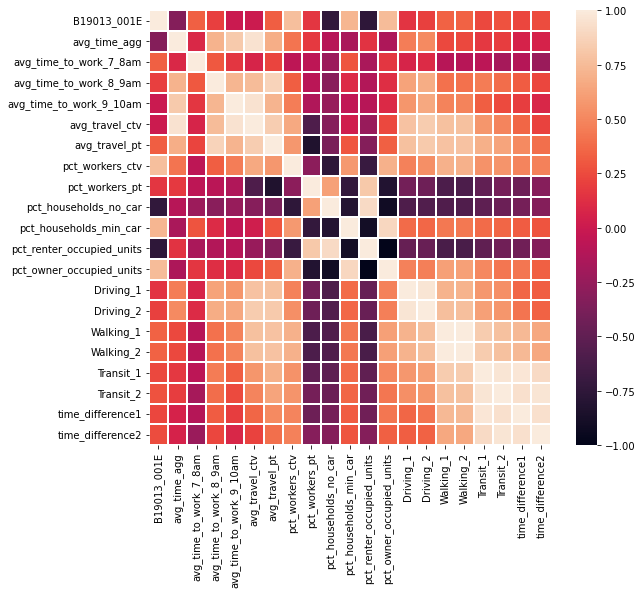

In [33]:
import seaborn as sns
corrmat= data2[['B19013_001E','avg_time_agg',
       'avg_time_to_work_7_8am', 'avg_time_to_work_8_9am',
       'avg_time_to_work_9_10am', 'avg_travel_ctv', 'avg_travel_pt',
       'pct_workers_ctv', 'pct_workers_pt', 'pct_households_no_car',
       'pct_households_min_car', 'pct_renter_occupied_units',
       'pct_owner_occupied_units','Driving_1','Driving_2','Walking_1','Walking_2','Transit_1','Transit_2','time_difference1','time_difference2']].corr()
f, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,linewidths=.1)

In [40]:
data_2019

,Unnamed: 0,NAME,B08133_001E,B08011_001E,B08011_007E,B08133_007E,B08011_008E,B08133_008E,B08011_009E,B08133_009E,...,pct_workers_ctv,pct_workers_pt,pct_households_no_car,pct_households_min_car,pct_renter_occupied_units,pct_owner_occupied_units,pct_white,pct_nonwhite,year,zip
0,0,ZCTA5,310085.0,13345,2107,40700.0,1945,42390.0,1405,36215.0,...,89.723693,3.241714,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,2019,02904
1,1,ZCTA5,404440.0,17372,2450,56790.0,1752,35670.0,3222,70965.0,...,84.999724,4.372550,18.507800,440.312738,67.734877,32.265123,47.560587,52.439413,2019,02909
2,2,ZCTA5,135890.0,6293,999,24120.0,932,17420.0,500,10775.0,...,85.661765,0.153186,5.440580,1738.039216,22.679753,77.320247,91.378457,8.621543,2019,02917
3,3,ZCTA5,NaN,350,26,NaN,15,NaN,63,NaN,...,100.000000,0.000000,4.743083,2008.333333,70.750988,29.249012,85.753804,14.246196,2019,02802
4,4,ZCTA5,NaN,254,61,NaN,44,NaN,0,NaN,...,87.401575,0.000000,16.853933,493.333333,12.921348,87.078652,100.000000,0.000000,2019,02826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,ZCTA5,359975.0,15134,2334,67255.0,1821,40495.0,2038,40760.0,...,82.248409,5.356355,14.198195,604.314869,55.666860,44.333140,64.077215,35.922785,2019,02908
73,73,ZCTA5,363785.0,16217,2595,66925.0,2362,40070.0,2372,47395.0,...,91.773024,2.432740,10.063116,893.727977,37.784554,62.215446,78.366743,21.633257,2019,02920
74,74,ZCTA5,NaN,657,114,NaN,40,NaN,56,NaN,...,100.000000,0.000000,7.223476,1284.375000,18.284424,81.715576,95.968449,4.031551,2019,02833
75,75,ZCTA5,222115.0,7782,914,25840.0,502,10150.0,764,17030.0,...,86.341711,5.991368,25.200721,296.814044,79.993446,20.006554,48.549791,51.450209,2019,02863


In [44]:
# data_2019 = data_2019.rename(columns = {'B19013_001E':'mhi'})
columns = ['zip','mhi','total_population_race','num_white_alone','num_baa_alone','pct_households_no_car','pct_households_min_car','pct_renter_occupied_units','pct_owner_occupied_units','pct_white','pct_nonwhite','Driving_1','Driving_2','Walking_1','Walking_2','Transit_1','Transit_2','time_difference1','time_difference2']
demographics_2019 = pd.DataFrame(data2, columns=columns)

demographics_2019

,zip,mhi,total_population_race,num_white_alone,num_baa_alone,pct_households_no_car,pct_households_min_car,pct_renter_occupied_units,pct_owner_occupied_units,pct_white,pct_nonwhite,Driving_1,Driving_2,Walking_1,Walking_2,Transit_1,Transit_2,time_difference1,time_difference2
0,02903,36347,10979,7281,1087,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,6.5,6.0,35.0,35.0,12.0,12.0,5.5,6.0
1,02903,36347,10979,7281,1087,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,6.0,6.5,19.0,19.0,19.0,21.0,13.0,14.5
2,02903,36347,10979,7281,1087,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,4.0,5.0,12.0,12.0,8.0,8.0,4.0,3.0
3,02903,36347,10979,7281,1087,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,5.0,5.0,13.0,13.0,12.0,16.0,7.0,11.0
4,02903,36347,10979,7281,1087,39.183153,155.211726,83.620506,16.379494,66.317515,33.682485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,02904,44269,30613,19801,5832,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,10.0,11.0,122.0,122.0,46.0,42.0,36.0,31.0
6,02904,44269,30613,19801,5832,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,8.5,9.5,89.0,89.0,49.0,48.0,40.5,38.5
7,02904,44269,30613,19801,5832,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,9.0,10.0,99.0,99.0,38.0,36.0,29.0,26.0
8,02904,44269,30613,19801,5832,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,10.0,11.0,83.0,83.0,35.0,34.0,25.0,23.0
9,02904,44269,30613,19801,5832,16.996267,488.364486,52.632833,47.367167,64.681671,35.318329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
